## Module 4 - Story Telling Exercise

1.	Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

2.	Get going by asking the following questions and looking for the answers with some code and plots:
    1.	Can you count something interesting?
    2.	Can you find some trends (high, low, increase, decrease, anomalies)?
    3.	Can you make a bar plot or a histogram?
    4.	Can you compare two related quantities?
    5.	Can you make a scatterplot?
    6.	Can you make a time-series plot?
   
3.	Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

4.	By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?


# 1. Pick a dataset 

# 2. Get going by asking the following questions and looking for the answers with some code and plots:
    Can you count something interesting?
    Can you find some trends (high, low, increase, decrease, anomalies)?
    Can you make a bar plot or a histogram?
    Can you compare two related quantities?
    Can you make a scatterplot?
    Can you make a time-series plot?

In [50]:
# set up the environment for the data exploration
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [51]:
# read in the csv file as a df, declaring null values, and initial look at the type of data and data types 
data = pd.read_csv('fxrates_usd_th_aud_jpy.csv', na_values=[' '])
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

       Date  US_THB  US_AUD  US_JPY
0  2-Jan-06     NaN     NaN     NaN
1  3-Jan-06   40.76  0.7379  116.34
2  4-Jan-06   40.43  0.7465  116.31
3  5-Jan-06   40.26  0.7482  115.96
4  6-Jan-06   39.83  0.7528  114.45

 Data Types:
Date       object
US_THB    float64
US_AUD    float64
US_JPY    float64
dtype: object


In [52]:
# drop the null values from df
data= pd.DataFrame(data).dropna()
print (data.head())

       Date  US_THB  US_AUD  US_JPY
1  3-Jan-06   40.76  0.7379  116.34
2  4-Jan-06   40.43  0.7465  116.31
3  5-Jan-06   40.26  0.7482  115.96
4  6-Jan-06   39.83  0.7528  114.45
5  9-Jan-06   39.73  0.7517  114.66


In [53]:
# do a df.describe to have a feel of the key stats of each currency pair - counts, high, low, increase, decrease, anomalies
np.round(data.describe(), 2)

,US_THB,US_AUD,US_JPY
count,2664.00,2664.00,2664.00
mean,32.94,0.88,100.86
std,2.38,0.12,14.70
min,28.60,0.61,75.72
25%,31.10,0.77,88.98
50%,32.45,0.89,101.66
75%,34.59,0.97,115.55
max,40.76,1.10,125.58


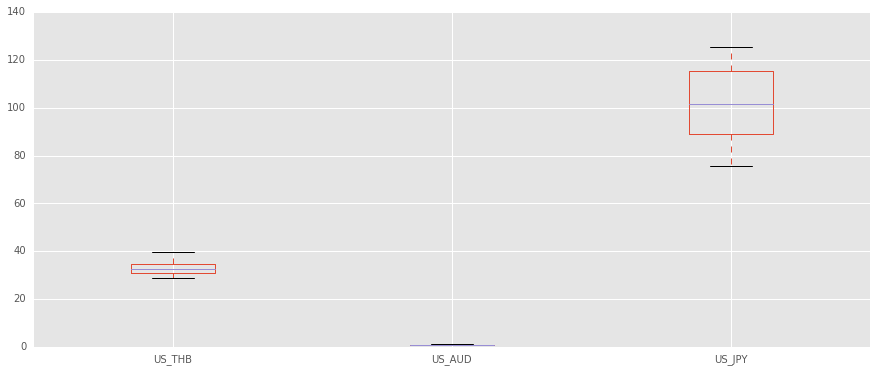

In [54]:
# do a box plot to compare the 3 currency pairs
data.plot(kind="box")

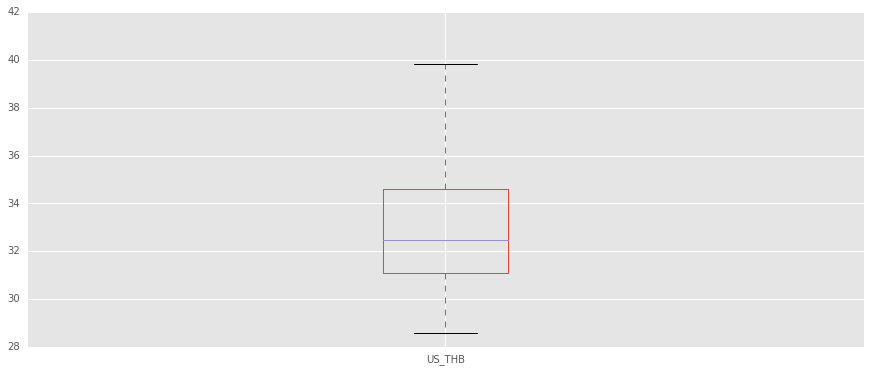

In [26]:
# do a boxplot of US_THB only
data.US_THB.plot(kind="box");

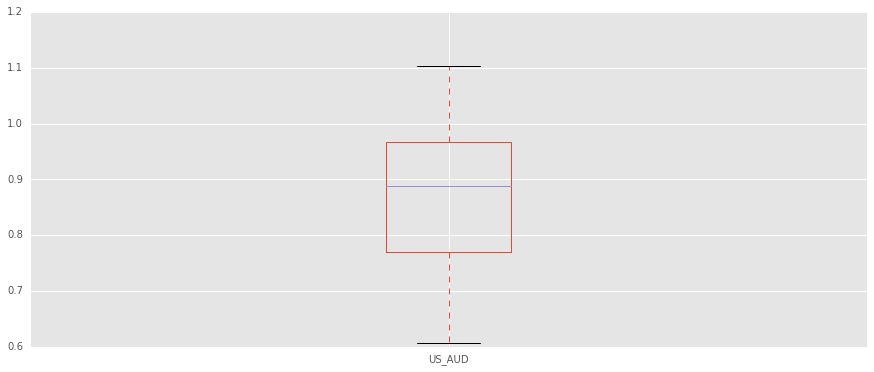

In [27]:
# do a boxplot of US_AUD only
data.US_AUD.plot(kind="box");

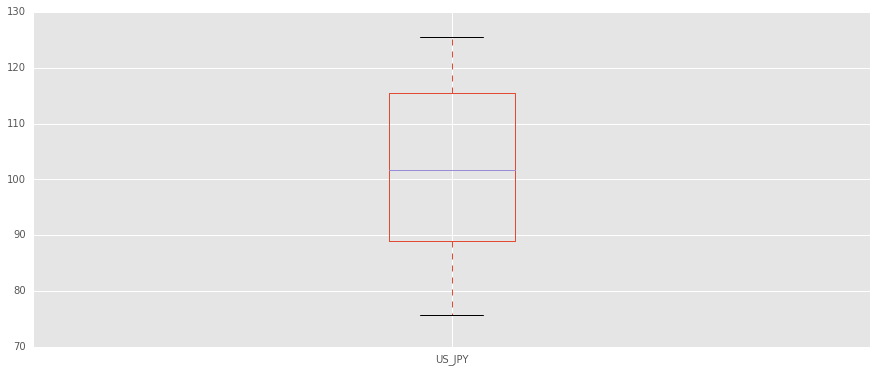

In [28]:
# do a boxplot of US_JPY only
data.US_JPY.plot(kind="box");

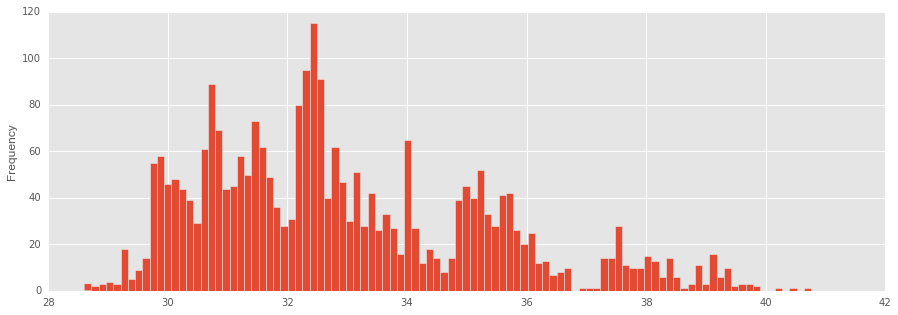

In [29]:
# do a histplot of US_THB only
data.US_THB.plot(kind="hist", figsize=(15,5), bins=100);

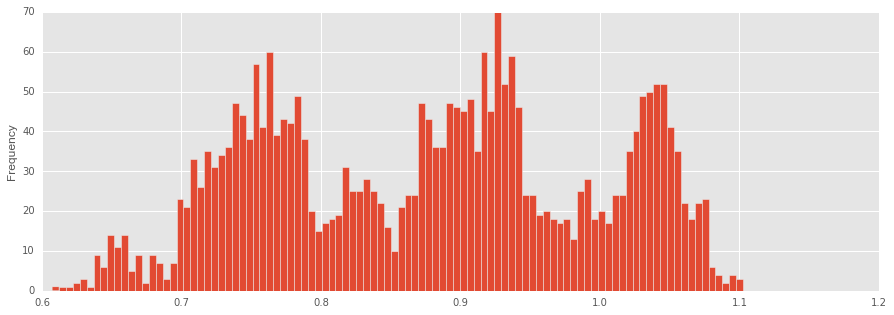

In [30]:
# do a histplot of US_AUD only
data.US_AUD.plot(kind="hist", figsize=(15,5), bins=100);

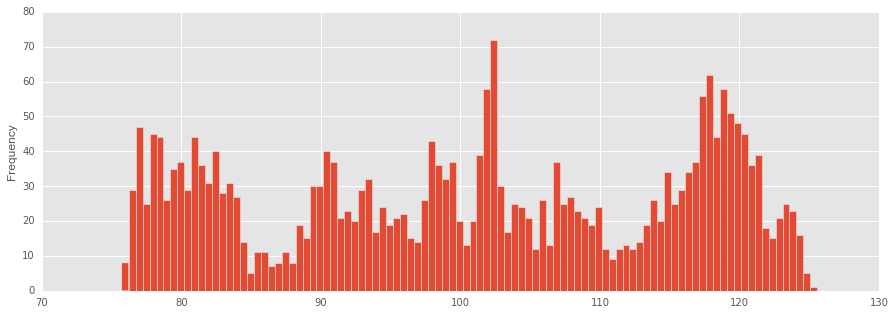

In [31]:
# do a histplot of US_JPY only
data.US_JPY.plot(kind="hist", figsize=(15,5), bins=100);

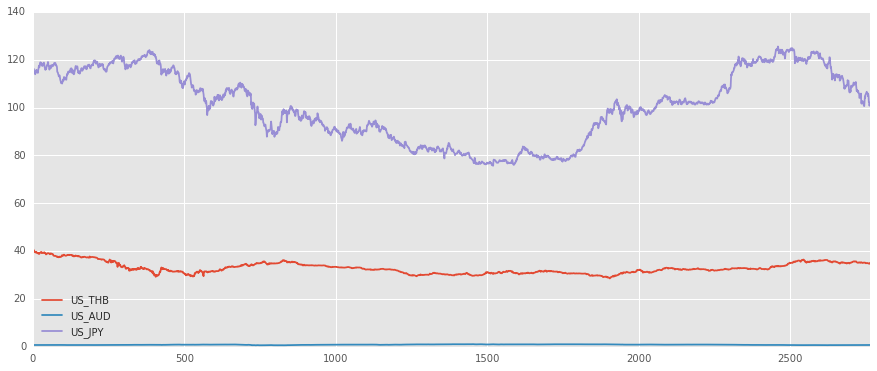

In [32]:
# try a numpy plot to compare the 3 time series pairs
data.plot()

In [33]:
# normalise the currency pairs by multiplying US_AUD rate by the approx mean ratio of US_THB/US_AUD (~35)
# and dividing the US/JPY rates by approx mean ratio of US_JPY/US_THB (~3)data_adj = data
data_adj = data
data_adj['US_AUD_ADJ'] = data_adj['US_AUD'] * 35
data_adj['US_JPY_ADJ'] = data_adj['US_JPY'] / 3
data_adj = data_adj.drop('US_AUD', 1)
data_adj = data_adj.drop('US_JPY', 1)
print (data_adj.head())

       Date  US_THB  US_AUD_ADJ  US_JPY_ADJ
1  3-Jan-06   40.76     25.8265   38.780000
2  4-Jan-06   40.43     26.1275   38.770000
3  5-Jan-06   40.26     26.1870   38.653333
4  6-Jan-06   39.83     26.3480   38.150000
5  9-Jan-06   39.73     26.3095   38.220000


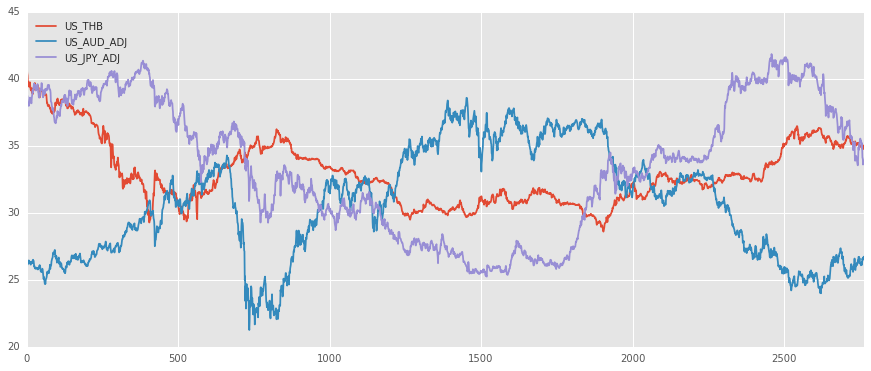

In [34]:
# try the numpy plot again to compare the adjusted time series pairs
data_adj.plot()

In [35]:
# for a start, there is a need to change 'Date' from data type 'object' to TS object
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')

In [36]:
# followed by a ts parse of the same original CVS data
data = pd.read_csv('fxrates_usd_th_aud_jpy.csv', na_values=[' '], parse_dates=[0], index_col=[0], date_parser=dateparse)
print (data.head())

            US_THB  US_AUD  US_JPY
Date                              
2006-01-02     NaN     NaN     NaN
2006-01-03   40.76  0.7379  116.34
2006-01-04   40.43  0.7465  116.31
2006-01-05   40.26  0.7482  115.96
2006-01-06   39.83  0.7528  114.45


In [43]:
# drop the null values and reduce dataset to only US_THB
data= pd.DataFrame(data.US_THB).dropna()
print (data.head())

            US_THB
Date              
2006-01-03   40.76
2006-01-04   40.43
2006-01-05   40.26
2006-01-06   39.83
2006-01-09   39.73


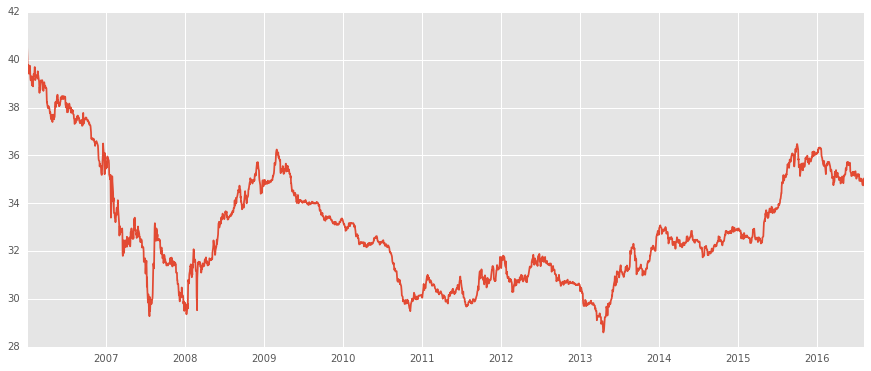

In [42]:
# do a ts plot
plt.plot(data.US_THB)

In [39]:
# this function calculates the rolling stats and Dicker-Fuller stats to test staionarity
from statsmodels.tsa.stattools import adfuller
from pandas import Series
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\rob7l\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\rob7l\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


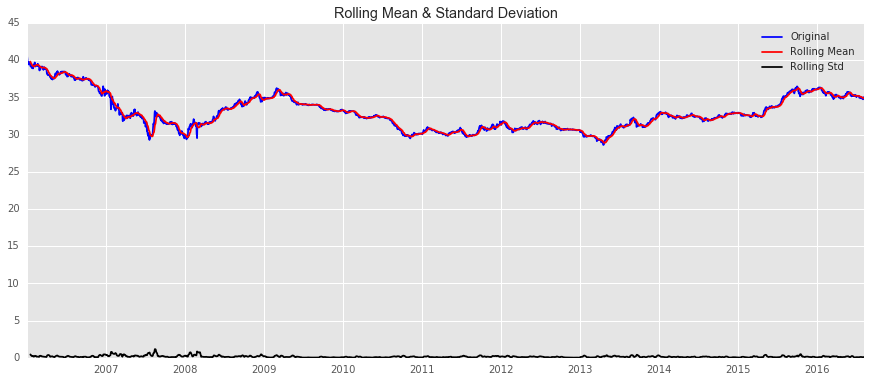

Results of Dickey-Fuller Test:
Test Statistic                   -2.606505
p-value                           0.091660
#Lags Used                       18.000000
Number of Observations Used    2645.000000
Critical Value (10%)             -2.567352
Critical Value (5%)              -2.862633
Critical Value (1%)              -3.432825
dtype: float64


In [41]:
# executes the test with the hypothesis:
# HO - the time series is non-staionary
# H1 - the time series is stationary
test_stationarity(data.US_THB)

# 3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

# 4. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

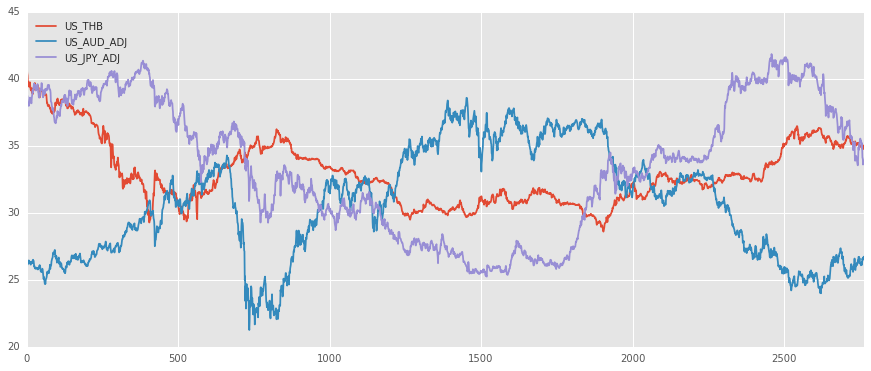

In [44]:
data_adj.plot()